In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [49]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

from sqlalchemy import Column, Integer, String, Float, Date, ForeignKey

In [50]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [51]:
# reflect an existing database into a new model

# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)




# class Stations:
#     # station - primary key
#     # name
#     # latitude
#     # longitude
#     # elevation
#     __tablename__ = "Stations"
#     station = Column(String, primary_key=True)
#     name = Column(String(255))
#     latitude = Column(Float)
#     longitude = Column(Float)
#     elevation = Column(Float)
    
    
# class Measurements:
#     # station - 
#     # date - date
#     # prcp - float
#     # tobs - integer
#     __tablename__  = "Measurements"
#     station = Column(String, ForeignKey('Stations.station'), 
#                     primary_key=True)
#     date = Column(Date)
#     prcp = Column(Float)
#     tobs = Column(Integer)

    


In [52]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [53]:
# Save references to each table
# reflect the tables
# Assign the station class to a variable called `Station`
Station = Base.classes.station
# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

In [54]:
# Create our session (link) from Python to the DB
# Create a session
session = Session(engine)

# # inspect the tables a bit
# inspector = inspect(engine)
# columns = inspector.get_columns('measurement')
# print('Measurement Table\n')
# for c in columns:
#     print(c['name'], c['type'])

# print('--------------------------')

# print('Station Table\n')
# columns = inspector.get_columns('station')
# for c in columns:
#     print(c['name'], c['type'])
# # Use `engine.execute` to select and display the first 10 rows from the emoji table
# engine.execute('SELECT * FROM station LIMIT 10').fetchall()
# engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()


# Exploratory Precipitation Analysis

In [123]:
# Find the most recent date in the data set.

# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

('2017-08-23',)


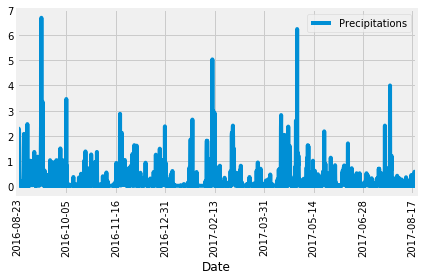

In [142]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(latest_date)



# Calculate the date one year from the last date in data set.
# lastest date found above
# 2017-08-23
# find the date of an year ago from last date
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation = (session.query(Measurement.date, Measurement.prcp
                              ).filter(Measurement.date >= query_date, Measurement.prcp != None
                                      ).order_by(Measurement.date).all())


# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitations'])

# precip_df = precip_df.set_index('Date', inplace=True)
# # Sort the dataframe by date
precip_df = precip_df.sort_values(by=['Date'])
precip_df = precip_df.set_index('Date')

precip_df.plot(rot=90)
plt.tight_layout()
plt.savefig('Precipitation.png')
# Use Pandas Plotting with Matplotlib to plot the data
# plt.show()


In [110]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitations
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [156]:
# Design a query to calculate the total number stations in the dataset
# Total dates
total = session.query(func.count(Station.station)).all()
total = total[0]
total
total = session.query(Station.station).count()
total

9

In [159]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [199]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs.cast(Integer))).\
                filter(Measurement.station == 'USC00519281').all()

result[0]

max_temp = session.query(func.max(Measurement.tobs.cast(Integer))).\
                filter(Measurement.station == 'USC00519281').all()

avg_temp = session.query(func.avg(Measurement.tobs.cast(Float))).\
                filter(Measurement.station == 'USC00519281').all()


def convert_string(string):
    lt = str(string[0])
    lt = lt.strip('(').strip(')').split(',')[0]
    lt = float(lt)
    return lt

print(f'Lowest temp: {convert_string(lowest_temp)}')
print(f'Max temp: {convert_string(max_temp)}')
print(f'Avg temp: {convert_string(avg_temp)}')

Lowest temp: 54.0
Max temp: 85.0
Avg temp: 71.66378066378067


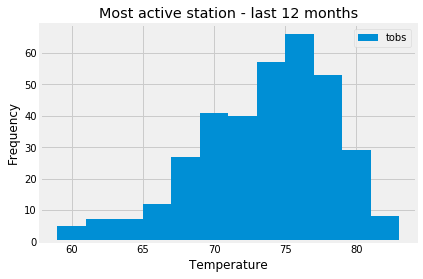

In [210]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.tobs).\
      filter(Measurement.date >= year_ago, Measurement.station == 'USC00519281').\
      order_by(Measurement.tobs).all()


temps_df = pd.DataFrame(temps, columns=['tobs'])
temps_df
bins = 12

temps_df.plot.hist(temps_df, bins)
plt.xlabel('Temperature')
plt.title('Most active station - last 12 months')
plt.savefig('temperatures.png')

# Close session

In [ ]:
# Close Session
session.close()